# Minería de Datos: Proyecto grupo 6


### Grupo 6
### Valorant dataset

Integrantes:
 - Carlos Ambiado
 - Cristóbal Isla
 - Felipe Jara
 - Nicolás Peña
 - Manuel Sepúlveda

# Hito 1:

# Introducción

El problema presentado consiste en estudiar un dataset de VALORANT, un videojuego multijugador competitivo de disparos en primera persona desarrollado por Riot Games y lanzado en 2020. El juego consiste en partidas de 5 contra 5 jugadores, donde cada equipo se enfrenta a otro en rondas de ataque y defensa en una variedad de mapas. Cada jugador debe escoger un personaje con habilidades únicas que se utilizan durante las rondas, además de las propias mecánicas de los disparos, para poder así ganar la partida. El objetivo principal de las rondas, y por tanto, la forma de ganar, es eliminar completamente al equipo contrario o, dependiendo si el equipo está atacando o defendiendo, deberán plantar la bomba en sitio enemigo logrando que explote, o desactivar la bomba plantada por el enemigo.
Este dataset contiene datos de partidas profesionales del juego hasta Enero de 2021.

Nos centramos en estudiar y analizar este dataset pues todos los integrantes del grupo jugamos VALORANT, por lo que nos pareció más interesante y entretenido para lograr un mejor entendimiento del juego y recuperar estadísticas interesantes o encontrar relaciones entre los datos para obtener conclusiones respecto a estos.

# Exploración de datos

Para la exploración de datos utilizamos Python y la librería de Pandas

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

Los datos estan en formato .sqlite, por lo que utilizamos la librería sqlite3 para conectarnos a la base de datos y cargarlos a un dataframe de pandas.

In [60]:
con = sqlite3.connect("valorant.sqlite")
game_scoreboard = pd.read_sql_query("SELECT * FROM game_scoreboard", con)
matches = pd.read_sql_query("SELECT * FROM matches", con)
games = pd.read_sql_query("SELECT * FROM games", con)
rounds = pd.read_sql_query("SELECT * FROM game_rounds", con)
con.close()

Primero que nada, filtraremos los datos para que estos sean solo partidas jugadas en el evento de más alto nivel; la VALORANT Champions

In [4]:
data = pd.merge(game_scoreboard, games, on='GameID')
merged = pd.merge(data, matches, on="MatchID")
filtered = merged[merged['EventName'] == 'VALORANT Champions']

Ahora podemos ver las primeras filas de cada tabla, y contar los datos nulos de cada columna.

In [ ]:
filtered.head()

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,...,Patch,EventID,EventName,EventStage,Team1ID_y,Team2ID_y,Team1_y,Team2_y,Team1_MapScore,Team2_MapScore
4809,57981,573,cNed,ACE,jett,178.0,16.0,16.0,0.0,0.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2
4810,57981,562,zeek,ACE,kayo,170.0,13.0,17.0,9.0,-4.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2
4811,57981,3672,BONECOLD,ACE,sova,168.0,14.0,16.0,4.0,-2.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2
4812,57981,565,starxo,ACE,viper,144.0,12.0,20.0,4.0,-8.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2
4813,57981,2894,Kiles,ACE,cypher,120.0,11.0,19.0,2.0,-8.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2


In [ ]:
assert(i==0 for i in filtered.isna().sum())

Para este evento, no existen datos nulos, por lo que no es necesario hacer una limpieza.

---
**Gráfico 1: Histograma de ADR**<br>
Una manera de medir la calidad de un jugador puede ser a través del daño que hacen a otros jugadores, para lo que se usa el ADR (Average Damage per Round). El Gráfico 1 de ADR vs. Frecuencia, nos puede servir como base para identificar si un jugador está por sobre la media en cuanto a daño inflingido por ronda. Como referencia, cada jugador inicia una ronda con 100 de vida y se tiene la posibilidad de comprar un escudo que añade 50 de vida adicional, la mayoría de las veces los jugadores compran el escudo, a no ser que la economía de su equipo no lo permita.

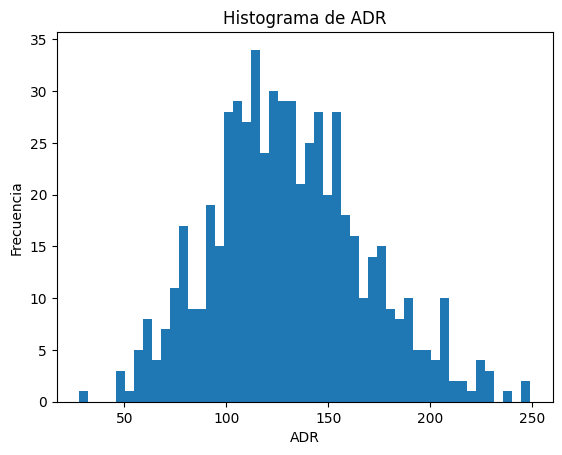

In [ ]:
plt.hist(filtered["ADR"], bins=50)
plt.title("Histograma de ADR")
plt.xlabel("ADR")
plt.ylabel("Frecuencia")
plt.show()


Se puede ver que los ADR más comunes se encuentran entre 100 y 150, y muy poco sobre 200. Se podría concluir que hacer el daño equivalente a matar 1.5 jugadores por ronda podría poner a alguien en la élite de los jugadores, pero veremos que el ADR no basta para juzgar la calidad de un jugador.

---
**Gráfico 2: ACS versus KAST Percent** <br>
ACS (Average Combat Score) es una medida que otorga el juego al finalizar una partida, trata de mejorar el ADR añadiendo otras variables importantes como kills, kills múltiples y asistencias por rondas jugadas. <br>
KAST (Kill, Assist, Survived, Traded) sirve para medir la eficacia de un jugador teniendo en cuenta variables que se consideran como positivas para el resultado de una ronda. <br> <br>
*Nota: Traded significa que el jugador murió pero alguién de su equipo rápidamente mató al enemigo que lo asesinó, donde se dice que las muertes se "tradean", lo que usualmente deja en ventaja posicional al equipo que logra el trade.*

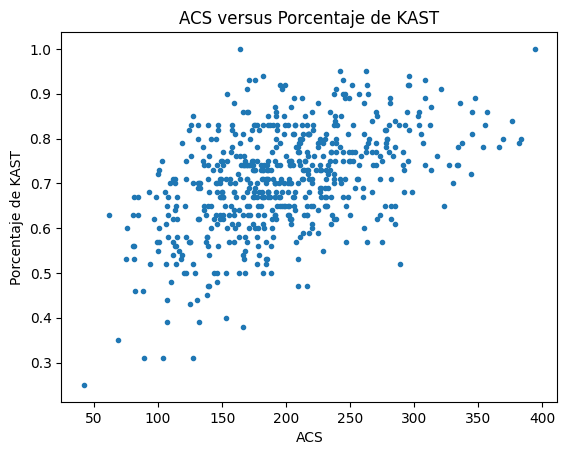

In [ ]:
plt.scatter(filtered["ACS"], filtered["KAST_Percent"], marker=".")
plt.title("ACS versus Porcentaje de KAST")
plt.xlabel("ACS")
plt.ylabel("Porcentaje de KAST")
plt.show()

En este gráfico se puede observar que, si bien mientras crezca el ACS crecerá el KAST, existen muchos KAST altos para ACS relativamente bajos. Con esto, podemos concluir que no sería correcto clasificar un jugador sólo por su ACS, ya que puede tener impacto a través de otras variables no relacionadas al daño.

---
**Gráfico 3: ACS por agente** <br>
En este gráfico se presentan los agentes del juego, cada agente tiene habilidades para distintas utilidades dentro del juego.

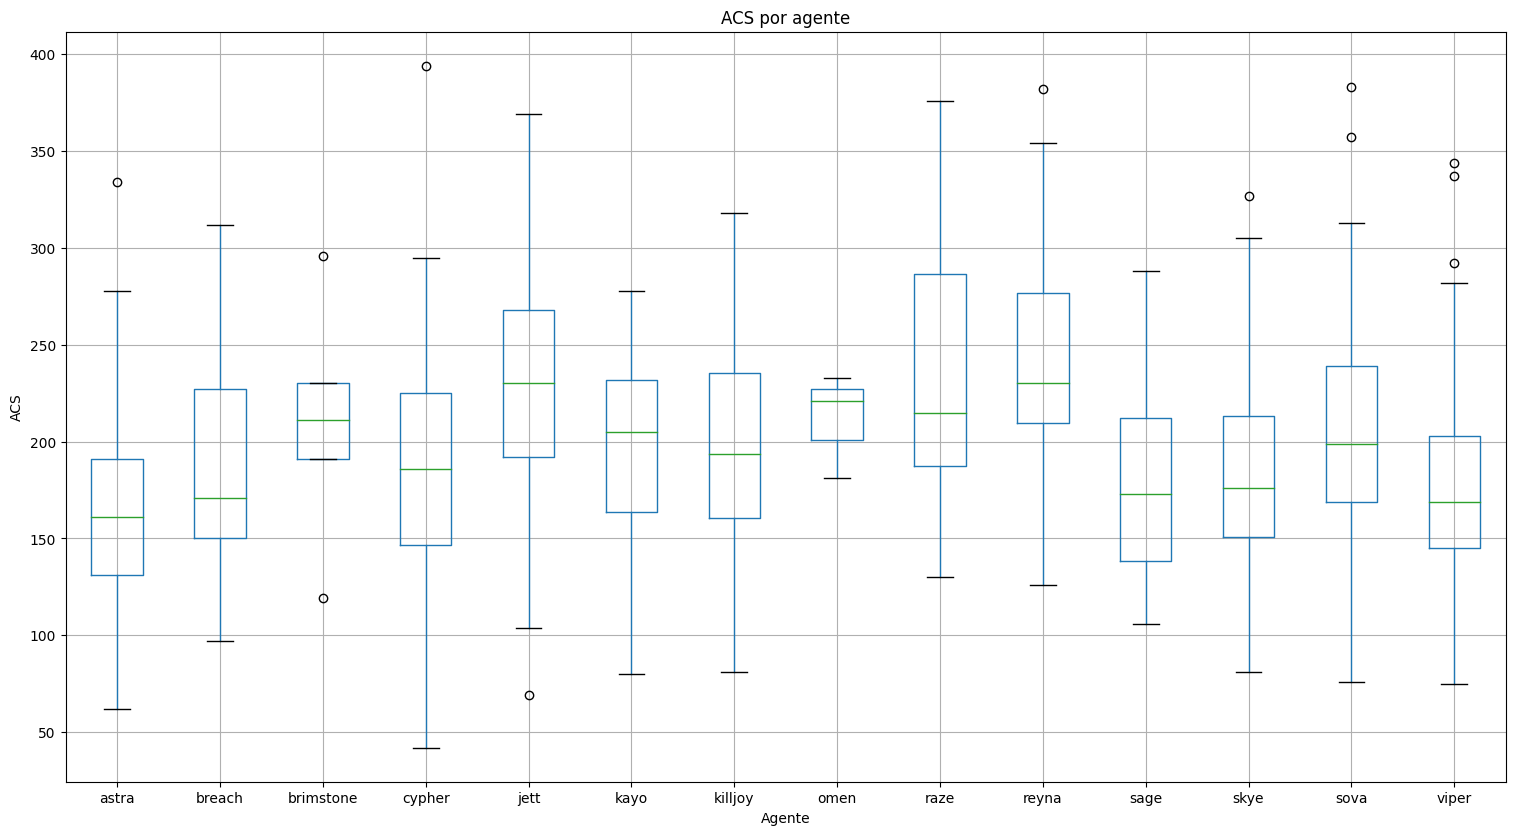

In [ ]:
newdf = filtered[["ACS", "Agent"]]
newdf = newdf[newdf.Agent != ""]
newdf.boxplot(column="ACS", by="Agent", figsize=(18,10))
plt.title("ACS por agente")
plt.suptitle("")
plt.xlabel("Agente")
plt.ylabel("ACS")
plt.show()

Con este gráfico se puede notar que hay agentes que usualmente tienen mayor ACS, y conociéndo el juego, eso se puede atrubuir que las habilidades de esos agentes están enfocadas a obtener kills. Aún así, se aprecia que la media de ACS es más o menos similar en todos los agentes del juego.

---

**Gráfico 4: ACS promedio por Jugador** <br>
Calculamos el promedio de ACS de todas las partidas registradas de los jugadores, y mostramos los mejores 10.

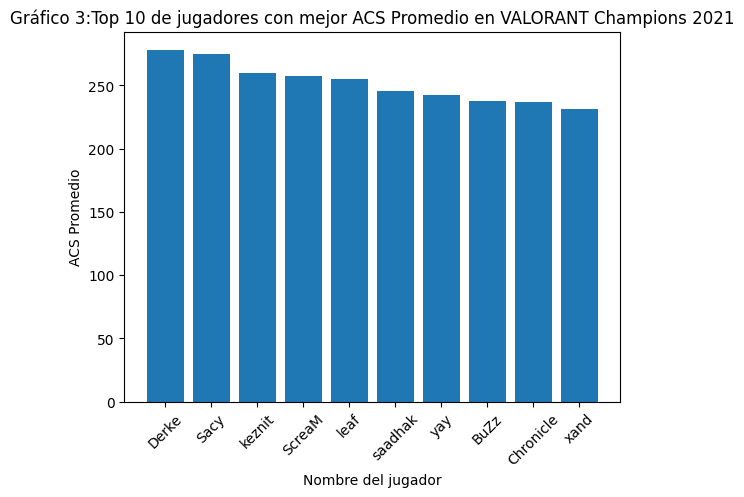

<Figure size 600x1200 with 0 Axes>

In [ ]:
acs_avg = filtered.groupby('PlayerName')['ACS'].mean().reset_index()

top_10 = acs_avg.sort_values(by='ACS', ascending=False).head(10)

plt.bar(top_10['PlayerName'], top_10['ACS'])
plt.xlabel('Nombre del jugador')
plt.ylabel('ACS Promedio')
plt.title('Gráfico 3:Top 10 de jugadores con mejor ACS Promedio en VALORANT Champions 2021')

plt.xticks(rotation=45, fontsize=10)
plt.figure(figsize=(6,12))
plt.subplots_adjust(bottom=0.4)

plt.show()

Con este gráfico podemos ver los jugadores profesionales con mejor promedio de ACS para luego ver sus demás estadísticas y encontrar distintas relaciones para clasificarlos.

# Preguntas y Problemas

Dada la alta competitividad que existe actualmente en la escena de los eSports, podría ser muy útil para los equipos observar tendencias en las partidas profesionales, ya sea para inventar nuevas estrategias, identificar los mejores jugadores, generar elecciones óptimas de agentes, entre otros, para que así los equipos tomen las mejores decisiones y tengan más probabilidades de ganar. Podríamos plantearnos las siguientes preguntas para resolver con minería de datos:

- ¿Podemos encontrar patrones para predecir qué equipo es más probable que gane?
- ¿Qué características hace que un jugador tenga mayor impacto en el resultado de una partida?
- Existen casos de jugadores que han parecido ser de élite usando un solo agente, pero resultan ser jugadores promedio cuando su personaje recibe nerfs[1]. ¿Es posible identificar cuando un jugador esta teniendo un alto rendimiento sólo debido al personaje que usa?

*[1]: Los nerfs son cambios negativos que el desarrollador de un juego le hace a un personaje cuando identifica que el uso de ese personaje conlleva a una excesiva probabilidad de ganar. Los nerfs nunca se aplican en medio de un torneo.*

Búsqueda del dataset: Cristóbal Isla y Nicolás Peña. <br>
Informe: Carlos Ambiado, Cristóbal Isla, Felipe Jara, Nicolás Peña y Manuel Sepúlveda. <br>
Gráficos y código: Carlos Ambiado, Felipe Jara y Cristóbal Isla. <br>

# Hito 2:

# Introducción

Para este hito 2 continuamos trabajando sobre el mismo dataset anterior, el cuál consistía en estadísticas de partidas profesionales de VALORANT. Sin embargo, ahora que poseemos más conocimientos acerca de técnicas de minería de datos cambiaremos el enfoque de algunas preguntas, añadiendo algunas nuevas que pueden ser interesantes de analizar mediante técnicas supervisadas como los clasificadores o no supervisadas como el clustering. Para esto, se realizará nuevamente una exploración de los datos, considerando esta vez una limpieza de los mismos con el fin de eliminar columnas innecesarias de las tablas para poder trabajar de mejor forma las preguntas y así mejorar lo obtenido en el Hito 1.

# Exploración de Datos

Los gráficos que hicimos nos dan una idea de como se relaciona el ACS con otras estadísticas, pero aún no lo relacionamos con la probabilidad de ganar una partida, lo que se explorará a continuación.

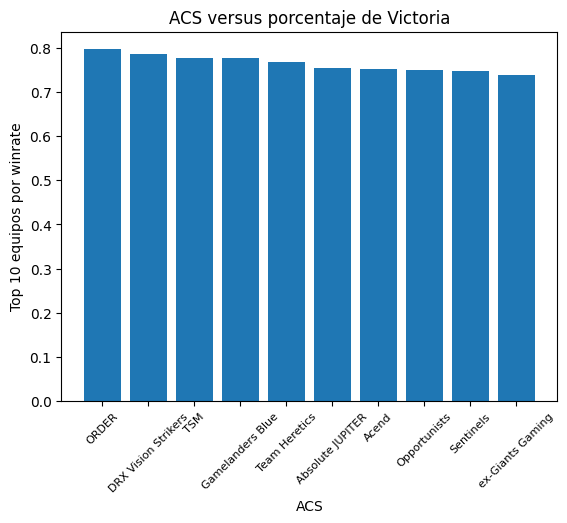

<Figure size 600x1000 with 0 Axes>

In [ ]:
#Top 10 winrates por equipo
games_team1 = games.groupby(["Team1"])["Team1"].count().reset_index(name="Count")
games_team2 = games.groupby(["Team2"])["Team2"].count().reset_index(name="Count")
games_team1 = games_team1.rename(columns={"Team1": "Team"})
games_team2 = games_team2.rename(columns={"Team2": "Team"})

merged_df = pd.merge(games_team1, games_team2, on="Team", how="inner")
merged_df
merged_df["Games"] = merged_df["Count_x"] + merged_df["Count_y"]
merged_df = merged_df[["Team", "Games"]]

wins = games.groupby(["Winner"])["Winner"].count().reset_index(name="Wins")
wins = wins.rename(columns = {"Winner": "Team"})

win_rate = pd.merge(merged_df, wins, on="Team", how="inner")
win_rate["Winrate"] = win_rate["Wins"] / win_rate["Games"]
win_rate['Games'] = win_rate['Games'].astype(int)
win_rate = win_rate.loc[(win_rate["Games"]) > 50]
top_10 = win_rate.sort_values(by='Winrate', ascending=False).head(10)



plt.bar(top_10["Team"], top_10["Winrate"])
plt.title("ACS versus porcentaje de Victoria")
plt.xlabel("ACS")
plt.ylabel("Top 10 equipos por winrate")

plt.xticks(rotation=45, fontsize=8)
plt.figure(figsize=(6,10))
plt.subplots_adjust(bottom=0.4)

plt.show()

# Preguntas y Problemas

Ahora que entendemos más las técnicas de minería de datos replanteamos nuestras preguntas para asi poder facilitar el desarrollo del proyecto. Las nuevas preguntas que se responderan son las siguientes:


- ¿Podemos agrupar a los jugadores según su desempeño en diferentes mapas?
- ¿Podemos identificar que equipo ganó de acuerdo a las estadísticas de una partida?
- ¿Existen grupos/clusters de jugadores con características de rendimiento similares en términos de sus estadisticas?

Para la segunda pregunta se planea crear un clasificador que, utilizando las estadisticas de una partida, pueda identificar el ganador de esta. Se creará un dataframe que contenga partidas y las estadisticas de sus jugadores como Kills, Deaths, ACS, etc. Luego, se aplicarán diferentes tecnicas de clasificación, como KNN, Arboles de decisión, Random Forests, etc. Se seleccionará el clasificador que mejor resultados entregue dentro de un dataset de testing, utilizando las metricas de Presicion, Recall, F1-score, entre otras. Se utilizan varias metricas porque se intentará llegar a un equilibrio.

Para este hito, se decidió trabajar la propuesta experimental con la tercera pregunta, lo cual se detalla en la siguiente sección. La primera pregunta se trabajará de manera similar a la tercera, pero primero se agruparan los datos por el mapa jugado.

# Propuesta Experimental


Para la primera pregunta se propone utilizar métodos de clustering, por lo que primero seleccionamos todo de la tabla game_scoreboard, la cual contiene las estadísticas de los jugadores:

In [ ]:
con = sqlite3.connect("valorant.sqlite")
df = pd.read_sql_query("SELECT * FROM game_scoreboard", con)
con.close
df.columns

Index(['GameID', 'PlayerID', 'PlayerName', 'TeamAbbreviation', 'Agent', 'ACS',
       'Kills', 'Deaths', 'Assists', 'PlusMinus', 'KAST_Percent', 'ADR',
       'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks',
       'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree',
       'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses'],
      dtype='object')

La siguiente tarea a realizar fue elegir las columnas que fueran relevantes para el experimento:

In [ ]:
df = df[["Agent", "ACS", "Kills", "Deaths", "Assists", "ADR", "HS_Percent", "FirstKills", "FirstDeaths"]]
print(df.shape)
df=df[df["Agent"]!=""]
df.dropna(inplace=True)
print(df.shape)
df.head()

(157939, 9)
(148467, 9)


,Agent,ACS,Kills,Deaths,Assists,ADR,HS_Percent,FirstKills,FirstDeaths
0,jett,313.0,24.0,10.0,3.0,195.0,0.31,4.0,4.0
1,chamber,227.0,16.0,10.0,7.0,161.0,0.16,1.0,1.0
2,sova,226.0,17.0,9.0,8.0,148.0,0.27,3.0,0.0
3,viper,218.0,17.0,12.0,2.0,141.0,0.19,3.0,0.0
4,skye,80.0,5.0,13.0,3.0,55.0,0.22,3.0,1.0


Luego, se transformaron los datos de tipo categórico a datos de tipo discreto:

In [ ]:
df_agent = pd.get_dummies(df["Agent"], prefix="agent", prefix_sep="_")
X = pd.concat([df, df_agent], axis=1).drop('Agent', axis=1)
X.columns

Index(['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'FirstKills',
       'FirstDeaths', 'agent_astra', 'agent_breach', 'agent_brimstone',
       'agent_chamber', 'agent_cypher', 'agent_jett', 'agent_kayo',
       'agent_killjoy', 'agent_omen', 'agent_phoenix', 'agent_raze',
       'agent_reyna', 'agent_sage', 'agent_skye', 'agent_sova', 'agent_viper',
       'agent_yoru'],
      dtype='object')

Para la siguiente parte, se utilizaron dos métodos de clustering, estos fueron el método de K-means y el método de DBSCAN.

# K-means

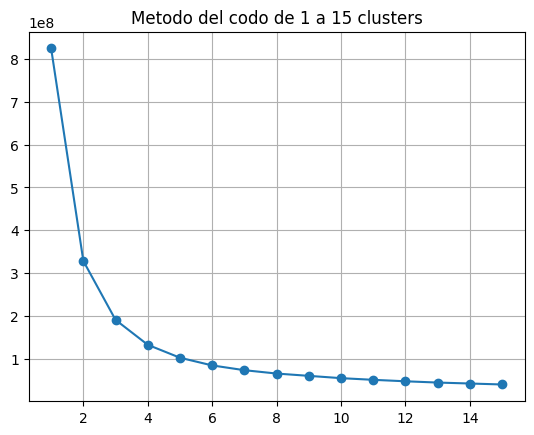

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Se usa el metodo del codo para ver cuantos clusters utilizar

sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k,n_init='auto').fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

Al observar el gráfico del método del codo, se encontraron dos puntos de inflexión destacados: uno en 4 clusters y otro en 6 clusters. Estos valores fueron seleccionados como candidatos para realizar el análisis de clustering.

In [ ]:
kmeans4 = KMeans(n_clusters=4, n_init='auto').fit(X)
kmeans6 = KMeans(n_clusters=6, n_init='auto').fit(X)

Una vez seleccionados los valores de clusters óptimos utilizando el método del codo (4 y 6 clusters en nuestro caso), se procedió a realizar un análisis de componentes principales (PCA) en los datos para reducir su dimensionalidad y permitir una mejor visualización de los resultados del clustering:

In [ ]:
from sklearn.decomposition import PCA
new_X = PCA(n_components=2, random_state=0).fit_transform(X)

Luego, con estos datos se realizaron los gráficos con 4 y 6 clusters respectivamente:

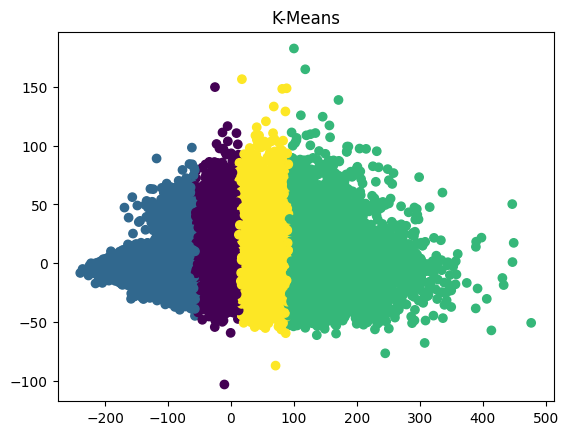

In [ ]:
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans4.labels_)
plt.title("K-Means")
plt.show()

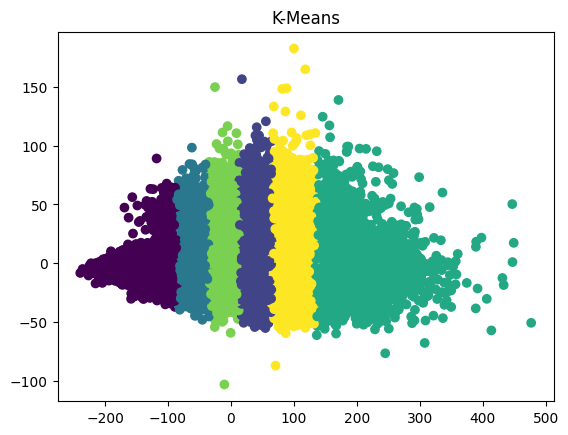

In [ ]:
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans6.labels_)
plt.title("K-Means")
plt.show()

Por último, se evaluaron los resultados obtenidos utilizando el índice de Silhouette en ambos clusters.

In [ ]:
from sklearn.metrics import silhouette_score
print("K-Means 4 clusters\t", silhouette_score(X, kmeans4.labels_))
print("K-Means 6 clusters\t", silhouette_score(X, kmeans6.labels_))

K-Means 4 clusters	 0.4307718665326056
K-Means 6 clusters	 0.3813376741245261


Para el algoritmo K-Means con 4 clusters, se obtuvo un valor de índice de Silhouette de 0.430, en cambio, el índice de Silhouette obtenido con 6 clusters fue de 0.381.
Aunque ambos valores son positivos, lo cual sugiere una estructura de clusters en los datos, el índice de Silhouette más alto obtenido con 4 clusters indica una mejor calidad en términos de separación y cohesión de los grupos.

# DBSCAN
A continuación se explica la utilización del método de DBSCAN para realizar el clustering sobre el mismo dataset.

Para comenzar con DBSCAN, es necesario determinar un parámetro llamado eps, que representa la distancia máxima permitida entre dos puntos para que se consideren vecinos. Para encontrar un valor óptimo de eps, se utilizó el método de la rodilla.

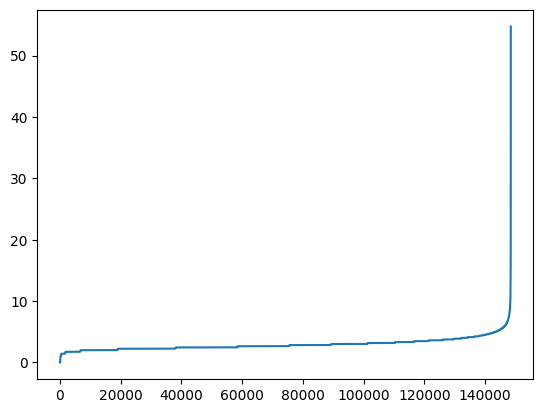

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Con el método de la rodilla se estima que el eps óptimo es 6, esto significa que se considerarán como vecinos a los puntos que estén a una distancia máxima de 6 unidades entre sí.

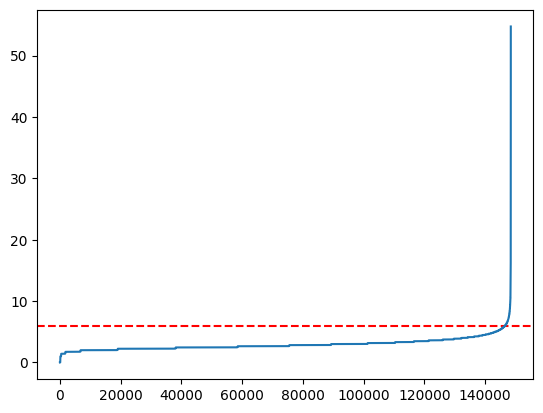

In [ ]:
eps_estimation = 6

plt.axhline(y=eps_estimation, color='r', linestyle='--')
plt.plot(distances)

Ahora, se ejecutan los clusters utilizando el valor `eps` estimado.

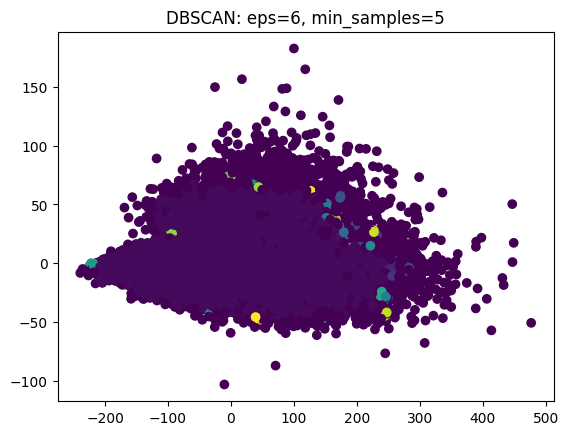

In [ ]:
from sklearn.cluster import DBSCAN

min_samples = 5

dbscan = DBSCAN(eps=eps_estimation, min_samples=min_samples).fit(X)
plt.scatter(new_X[:,0], new_X[:,1], c=dbscan.labels_)
plt.title(f"DBSCAN: eps={eps_estimation}, min_samples={min_samples}")
plt.show()

Al igual que para el método anterior, calculamos el índice de Silhouette asociado para evaluar el cluster.

In [ ]:
print("DBSCAN\t", silhouette_score(X, dbscan.labels_))

Como se puede observar, el índice de Silhouette obtenido con DBSCAN es muy bajo, siendo negativo e incluso relativamente cercano a -1, lo cual indica una calidad de clustering bastante baja. Esto puede ser debido a varias razones, como la densidad de los datos, una mala elección de parámetros o por la propia naturaleza de los datos, sin embargo como se utilizó un método visto en clases para determinar el eps, consideramos que el motivo debe ser la primera o tercera opción. Por lo tanto, concluimos que el clustering realizado con DBSCAN no es apropiado para abordar esta pregunta con nuestros datos.

## Exploración de los resultados

Con el cálculo del índice de Silhouette para ambos métodos se puede ver que K-Means con 4 clusters es el que da mejores resultados, con un índice de 0.430. A continuación se exploraron los clusters generados por este método.

Lo primero que se hizo fue agregar una columna con el cluster respectivo de cada fila.

In [ ]:
df['Cluster'] = kmeans4.labels_
df.groupby('Cluster')['ACS'].mean().reset_index()

,Cluster,ACS
0,0,183.963256
1,1,318.593746
2,2,125.028823
3,3,241.126755


Ahora se muestran los promedios de alguna de las estadísticas de cada cluster.

In [ ]:
df.groupby('Cluster')['Kills'].mean().reset_index()

,Cluster,Kills
0,0,13.294695
1,1,22.303426
2,2,8.260464
3,3,17.749887


In [ ]:
df.groupby('Cluster')['Deaths'].mean().reset_index()

,Cluster,Deaths
0,0,14.924910
1,1,12.537486
2,2,15.011487
3,3,14.327130


In [ ]:
df.groupby('Cluster')['HS_Percent'].mean().reset_index()

,Cluster,HS_Percent
0,0,0.233354
1,1,0.254430
2,2,0.215874
3,3,0.244220


Notamos que se agruparon los clusters principalmente por su ACS y kills, mientras que Deaths y HS_Percent (disparos a la cabeza) no tuvieron mucho efecto en como quedaron los clusters.

Ahora veremos si los agentes tuvieron algo que ver en la asignación de clusters. Para ellos contamos la cantidad de repeticiones de ellos en la agrupación.

In [ ]:
agent_count = df.groupby(["Cluster", "Agent"]).size().reset_index(name = "Count")
cluster_0 = agent_count.loc[(agent_count["Cluster"]) == 0]
cluster_0.sort_values(by="Count", ascending=False).head(5)

,Cluster,Agent,Count
14,0,sova,9021
5,0,jett,6682
8,0,omen,6067
4,0,cypher,5036
7,0,killjoy,4648


In [ ]:
cluster_1 = agent_count.loc[(agent_count["Cluster"]) == 1]
cluster_1.sort_values(by="Count", ascending=False).head(5)

,Cluster,Agent,Count
22,1,jett,4495
27,1,raze,2921
31,1,sova,1840
28,1,reyna,1354
24,1,killjoy,947


In [ ]:
cluster_2 = agent_count.loc[(agent_count["Cluster"]) == 2]
cluster_2.sort_values(by="Count", ascending=False).head(5)

,Cluster,Agent,Count
48,2,sova,4967
42,2,omen,4194
38,2,cypher,3562
46,2,sage,2798
39,2,jett,2790


In [ ]:
cluster_3 = agent_count.loc[(agent_count["Cluster"]) == 3]
cluster_3.sort_values(by="Count", ascending=False).head(5)

,Cluster,Agent,Count
56,3,jett,7991
65,3,sova,6814
61,3,raze,4781
59,3,omen,3716
58,3,killjoy,3578


No es posible apreciar un patrón claro a primera vista, pero conociendo el estado del juego en el año 2021, se sabe que el agente Sova era fundamental en cualquier partida, por lo que no es raro que aparezca muchas veces en todos los clusters. Por otra parte, el cluster 1, que es el que posee mayor promedio de Kills y ACS, presenta 3 agentes de rol duelista: Jett, Raze y Reyna, los cuales son personajes cuyas habilidades les permiten efectuar mejores duelos contra el enemigo, por lo que tiene sentido que aparezcan mucho en el cluster con mayores promedios.

Podemos ver que el metodo con mejores resultados se basa principalmente en las estadísticas ACS y Kills de los jugadores, por lo que sí pudimos encontrar grupos de jugadores respecto a sus estadísticas, pero como dijimos en el Hito 1, el ACS puede no representar que tan bueno es un jugador, por lo que vale la pena hacer de nuevo este experimento sin mirar estas estadísticas.

Informe: Felipe Jara, Cristóbal Isla, Nicolás Peña, Manuel Sepúlveda y Carlos Ambiado. <br> Presentación: Felipe Jara y Cristóbal Isla.


# Hito 3

In [66]:
# Limpiar campos None
new_rounds = rounds.dropna(subset=['RoundHistory'])

In [111]:
import hjson

all_round_history = new_rounds["RoundHistory"]
max_rounds = 25
new_columns = {}
for row in all_round_history:
    round_history = hjson.loads(row)
    
    # Iterate through the rounds in the JSON data
    for round_num in range(1, max_rounds + 1):
        round_data = round_history.get(str(round_num))
        round_prefix = f"Round{round_num}"
        
        # Extract the required information for each round
        round_winner = round_data['RoundWinner'] if round_data else None
        score_after_round = round_data['ScoreAfterRound'] if round_data else None
        win_type = round_data['WinType'] if round_data else None
        team1_bank = round_data['Team1Bank'] if round_data else None
        team2_bank = round_data['Team2Bank'] if round_data else None
        team1_buy_type = round_data['Team1BuyType'] if round_data else None
        team2_buy_type = round_data['Team2BuyType'] if round_data else None
        
        # Store the data in the respective column of the dictionary
        new_columns.setdefault(f"{round_prefix}_RoundWinner", []).append(round_winner)
        new_columns.setdefault(f"{round_prefix}_ScoreAfterRound", []).append(score_after_round)
        new_columns.setdefault(f"{round_prefix}_WinType", []).append(win_type)
        new_columns.setdefault(f"{round_prefix}_Team1Bank", []).append(team1_bank)
        new_columns.setdefault(f"{round_prefix}_Team2Bank", []).append(team2_bank)
        new_columns.setdefault(f"{round_prefix}_Team1BuyType", []).append(team1_buy_type)
        new_columns.setdefault(f"{round_prefix}_Team2BuyType", []).append(team2_buy_type)
        
# Create the new dataframe using the dictionary
new_df = pd.DataFrame(new_columns)

# Concatenate the original dataframe and the new dataframe
extended_round_history = pd.concat([new_rounds, new_df], axis=1)
extended_round_history.head